In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from markdown import markdown
from collections import defaultdict, Counter

%load_ext autoreload
%matplotlib inline

# Procedural Generation and Generative Art

![Robobross](images/robobross.png)

<center><img src="images/bobrossprocess.png" width="360px" /></center>

<center>
    <img src="images/before.jpg" width="294" style="display: inline-block;" /> => <img src="images/after.png" style="display: inline-block;" />
</center>

# Procedural Generation

### Using algorithms to produce graphics, content, and models.

### Art

[Watercolors](http://www.tylerlhobbs.com/writings/watercolor)
<center><img src="images/watercolor.jpg" width="400"/></center>

### More art

<center><img src="images/ella.jpg" width=400 /></center>

### World Building

<center><img src="images/world.gif" width=450/></center>

### Terrain generation

<center><img src="images/desert.jpg" /></center>

### City Building

<center><img src="images/city.png" width=500/></center>

### Simulation

<center>
<video width=400 controls>
    <source src="images/erosion.mp4" type="video/mp4">
</video>
</center>

### Plant modeling

<center><img src="images/plantmodels.jpg" /></center>

### Leaf generation

<center><img src="images/leafs.png" width=500/></center>

### Spaceships

<center><img src="images/spaceships.png" width=400 /></center>

### Dinosaurs!

<center><img src="images/dinos.gif" width=400 /></center>

# How is it done

- Stochastic processes
- Grammars
- Automata
- Noise
- Hybrid methods

# It's an art

Although many mathematical frameworks for systems/graphics/models exist, results ultimately rely on the constraints and decisions imposed by the programmer/artist/scientist.

The following outlines some popular frameworks that are often used to generate graphics, or model sytems for investigation.

In [43]:
with open('reddit.txt', 'w') as f:
    f.write(all_text)

In [143]:
with open('reddit.txt', 'r') as f:
    all_text = f.read()
bigrams = [b for b in zip(all_text.split(' ')[:-1], all_text.split(' ')[1:])]

In [144]:
all_text[:20]

'live link needs powe'

## Markov Chains
![MC](images/markovchain.png)

## Application of Markov Chains

- [Prose and Poetry generation](https://www.prism.gatech.edu/~bnichols8/projects/markovchains/main.shtml)
- [Music generation](https://karlhiner.com/music_generation/midi_markov/)
- [Texture synthesis](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.44.14&rep=rep1&type=pdf)
- [Word prediction](https://medium.com/ymedialabs-innovation/next-word-prediction-using-markov-model-570fc0475f96)

## An example
### Generating gibberish from r/proceduralgeneration

See also:
* [SubredditSimulator](https://www.reddit.com/r/SubredditSimulator/)

In [10]:
page = requests.get('https://www.reddit.com/r/proceduralgeneration'
                    '/search.json?q=self%3Atrue&restrict_sr=on')
children = page.json()['data']['children']
posts = [child['data']['selftext'] for child in children]
posts = [''.join(BeautifulSoup(markdown(post)).findAll(text=True))
         for post in posts]
all_text = ' '.join(posts).lower()
all_text = ''.join(e for e in all_text if e.isalnum() or e == ' ')
bigrams = [b for b in zip(all_text.split(' ')[:-1], all_text.split(' ')[1:])]

In [145]:
bigrams[0:3]

[('live', 'link'), ('link', 'needs'), ('needs', 'powerful')]

In [146]:
def transitions_normed(bigrams):
    C = Counter(bigrams)
    T = defaultdict(lambda: defaultdict(int))
    for b, count in C.items():
        T[b[0]][b[1]] = count
    for bk, bv in T.items():
        s = sum(bv.values())
        for k, v in bv.items():
            T[bk][k] = v/s
    return T

In [147]:
T = transitions_normed(bigrams)
list(T['a'].items())[:4]

[('mod', 0.009708737864077669),
 ('system', 0.009708737864077669),
 ('huge', 0.009708737864077669),
 ('screen', 0.009708737864077669)]

In [148]:
lett, s = 'a', 'a '
for _ in range(20):
    l = np.random.choice(list(T[l].keys()), p=list(T[l].values()))
    s += l+' '
s

'a lot of the example the rooms themselves generated on google  im making a single integer cube in rust are '

Try again...

## Alice in wonderland

In [129]:
with open('alice.txt') as f:
    all_text = f.read().replace('\n', ' ').strip()

In [130]:
all_text = ''.join(e for e in all_text.lower() if e.isalnum() or e == ' ')
bigrams = [b for b in zip(all_text.split(' ')[:-1], all_text.split(' ')[1:])]
T = transitions_normed(bigrams)

In [140]:
l, s = 'alice', 'alice '
for _ in range(20):
    l = np.random.choice(list(T[l].keys()), p=list(T[l].values()))
    s += l+' '
s

'alice looked down on the caterpillar was at last turned crimson velvet cushion and the king in a tree in a '

## Applications in genomics
### Hidden Markov Models

[Hidden Markov Models and their Applications in Biological Sequence
Analysis](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2766791/pdf/CG-10-402.pdf)

![HMM](images/hmm.png)

### More example of markov chains

[Music!](https://karlhiner.com/music_generation/midi_markov/)

## L-Systems

L as in [Lindenmayer](https://en.wikipedia.org/wiki/L-system).

Grammars used to describe how a given state will evolve.

![trees](images/trees.jpg)

## Applications of L-Systems


- Fractals
- [Plant modelling](https://allenpike.com/modeling-plants-with-l-systems/)
- [Music](http://www.acma.asn.au/acmc05/acmc05-143-148.pdf)
- [Ryme Detection](http://ismir2009.ismir.net/proceedings/OS8-1.pdf)(Stochastic Grammar)

### Cantor Set

Described as an initial state and a set of rules (L-system grammar) for evolution.

Initial State: $A$

Rules: $\left\{ A \rightarrow ABA \right\}, \left\{B \rightarrow BBB\right\}$

In [204]:
rules = {'─': '─ ─', ' ': '   '}
S0 = '─'

def step(s0):
    return ''.join([rules[s] for s in s0])

def space(n):
    if n == 0:
        return 1
    if n == 1:
        return 3
    return 3*space(n-1)

N = 5
for i in range(N):
    print(''.join([s*space(N-i-1) for s in S0]))
    S0 = step(S0)

─────────────────────────────────────────────────────────────────────────────────
───────────────────────────                           ───────────────────────────
─────────         ─────────                           ─────────         ─────────
───   ───         ───   ───                           ───   ───         ───   ───
─ ─   ─ ─         ─ ─   ─ ─                           ─ ─   ─ ─         ─ ─   ─ ─


### Space Filling Curves
<center><img src="images/spacefilling.png" width="400"/></center>

### Plants

start : X

rules : $\left\{X → F+[[X]-X]-F[-FX]+X\right\}, \left\{F → FF\right\}$

<center><img src="images/fractal-plant.png" width=400 /></center>

### Stochastic rules in 3D

Rules could also be probabalistic.

<center><img src="images/lsystrees.png" width=600 /></center>

### Idea!

Could you create rules given an L-system grammar using a Markov chain? Genetic algorithms?

In [241]:
#ignore
import numpy as np
import matplotlib.pyplot as plt
import csv
import noise
from matplotlib.patches import Polygon
from matplotlib.collections import PolyCollection, PatchCollection
from scipy.spatial import Voronoi, voronoi_plot_2d, ConvexHull
from scipy.interpolate import interp1d, UnivariateSpline, splev, splprep

%matplotlib inline

In [251]:
%autoreload
from utils.maps import biome_heights, biome_colors, Biome, draw_biomes

# Noise and Randomness

Rules are boring, we need noise.

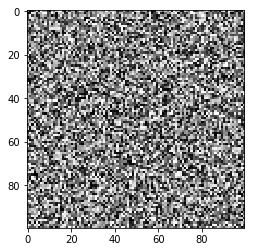

In [320]:
im = np.random.rand(100,100)
plt.imshow(im, cmap='gray')
plt.show()

### Perlin noise

Continous noise

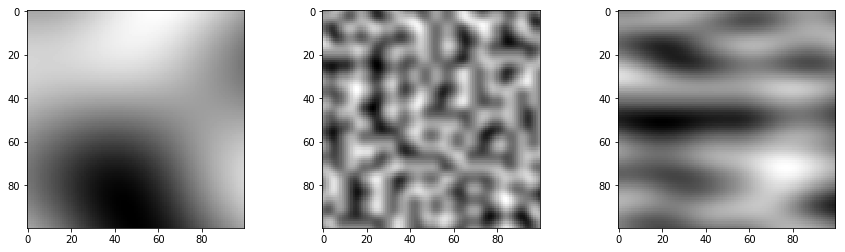

In [321]:
XX, YY = np.linspace(0,1,100), np.linspace(0,1,100); mesh = np.meshgrid(XX,YY); pnoise = np.vectorize(noise.pnoise3); plt.figure(figsize=(15,4))
plt.subplot(1,3,1); plt.imshow(pnoise(mesh[0]*1, mesh[1]*1, 123), cmap='gray')
plt.subplot(1,3,2); plt.imshow(pnoise(mesh[0]*10, mesh[1]*10, 123), cmap='gray')
plt.subplot(1,3,3); plt.imshow(pnoise(mesh[0]*2, mesh[1]*5, 123), cmap='gray')
plt.show()

## Map generation

We can create a world with nothing but a set of points and color map

## Create Some Points

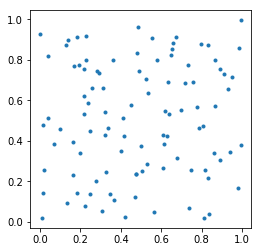

In [296]:
seed = 55555; N = 100; np.random.seed(seed)
# x, y coordinate pairs
pts = np.random.rand(N,2)
plt.plot(pts[:,0], pts[:,1], '.')
plt.gca().set_aspect(1)
plt.show()

## Use voronoi cells to draw land regions

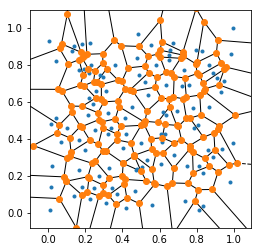

In [297]:
vor = Voronoi(pts)
voronoi_plot_2d(vor)
plt.gca().set_aspect(1)
plt.show()

In [268]:
biomes = {}
# make point objects from the voronoi points and verticies
for i, pt in enumerate(vor.points):
    # The bounding verticies
    verts = vor.vertices[vor.regions[vor.point_region[i]]]
    
    biomes[i] = Biome(i, pt, verts)
    
    if -1 in vor.regions[vor.point_region[i]]:
        biomes[i].outside = True
    
for ridge in vor.ridge_points:
    biomes[ridge[0]].neighbors.append(biomes[ridge[1]])
    biomes[ridge[1]].neighbors.append(biomes[ridge[0]])
    
XX, YY = np.linspace(0,1,100), np.linspace(0,1,100)
mesh = np.meshgrid(XX,YY)
pnoise = np.vectorize(noise.pnoise3)

### Generating a height map

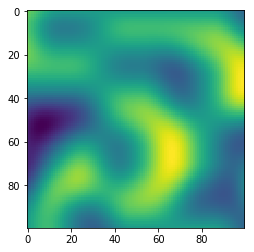

In [269]:
# Noise panning
pan = [ 0.5, 0.0 ]
noise_seed = seed #116
htscale = 3.0
Hi = pnoise(mesh[0]*htscale+pan[0], mesh[1]*htscale+pan[1], noise_seed)
plt.imshow(np.flipud(Hi))

### Generating a humidity map

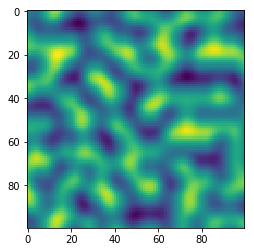

In [270]:
humscale = 8.0
Hm = pnoise(mesh[0]*humscale+pan[0], mesh[1]*humscale+pan[1], noise_seed+1)
plt.imshow(np.flipud(Hm))
plt.show()

In [273]:
%autoreload
for b in biomes.values():
    b.assign_biome(noise_seed, htscale, humscale, pan, False)

/Users/kolbmand/Documents/proc-gen/venv/lib/python3.6/site-packages/scipy/spatial/_plotutils.py:20: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  was_held = ax.ishold()


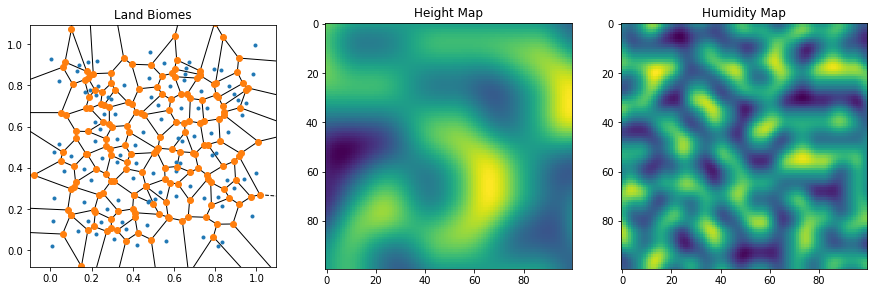

In [290]:
plt.figure(figsize=(15,5)); plt.subplot(1,3,1); voronoi_plot_2d(vor, ax=plt.gca()); plt.gca().set_aspect(1); plt.title('Land Biomes')
plt.subplot(1,3,2); plt.imshow(np.flipud(Hi)); plt.title('Height Map')
plt.subplot(1,3,3); plt.imshow(np.flipud(Hm)); plt.title('Humidity Map')
plt.show()

### Use Whittaker classification to color regions

<center><img src="images/whittaker.jpg" width=450/></center>

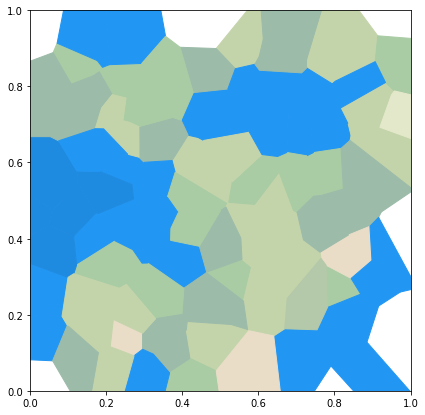

In [295]:
plt.figure(figsize=(7,7))
draw_biomes(biomes)
plt.gca().set_aspect(1)
plt.show()

# Oscilloscope Music

<iframe width="600" height="338" src="https://www.youtube.com/embed/ZaTuFB5QXHo" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>

# [Shader Toy](https://www.shadertoy.com/)

# Demos

<iframe width="1440" height="569" src="https://www.youtube.com/embed/gY0IAnybDm0" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>